## Heart Disease Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('E:/CV and Cover Letter/Data Analyst job/python challenges/Heart Disease/heart_disease_uci.csv')

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data = data.rename(columns={'cp':'chest pain', 'trestbps':'resting blood press', 'chol':'cholesterol','fbs':'fasting blood sugar', 'restecg':'resting electrocardio result','thalach':'max heart rate','exang':'excer induce angina','oldpeak':'ST depression','ca':'num of major vessel','thal':'thalassemia category','num':'heart disease diagnosis'})

In [5]:
data.head()

,id,age,sex,dataset,chest pain,resting blood press,cholesterol,fasting blood sugar,resting electrocardio result,thalch,excer induce angina,ST depression,slope,num of major vessel,thalassemia category,heart disease diagnosis
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
data.shape

(920, 16)

In [7]:
print(f'There are {data.shape[0]} patients record with {data.shape[1]} of features')

There are 920 patients record with 16 of features


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            920 non-null    int64  
 1   age                           920 non-null    int64  
 2   sex                           920 non-null    object 
 3   dataset                       920 non-null    object 
 4   chest pain                    920 non-null    object 
 5   resting blood press           861 non-null    float64
 6   cholesterol                   890 non-null    float64
 7   fasting blood sugar           830 non-null    object 
 8   resting electrocardio result  918 non-null    object 
 9   thalch                        865 non-null    float64
 10  excer induce angina           865 non-null    object 
 11  ST depression                 858 non-null    float64
 12  slope                         611 non-null    object 
 13  num o

### Data descriptive summary

In [9]:
data.describe()

,id,age,resting blood press,cholesterol,thalch,ST depression,num of major vessel,heart disease diagnosis
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


### Based on the summary statistics, the patients' ages range from 28 to 77 years. The maximum cholesterol level recorded among the patients was 603. Heart disease was observed with mild presence in approximately 50% of patients around the age of 54, escalating to moderate presence in patients around the age of 60.

In [10]:
data.isna().sum().sort_values(ascending=False)

num of major vessel             611
thalassemia category            486
slope                           309
fasting blood sugar              90
ST depression                    62
resting blood press              59
thalch                           55
excer induce angina              55
cholesterol                      30
resting electrocardio result      2
id                                0
age                               0
sex                               0
dataset                           0
chest pain                        0
heart disease diagnosis           0
dtype: int64

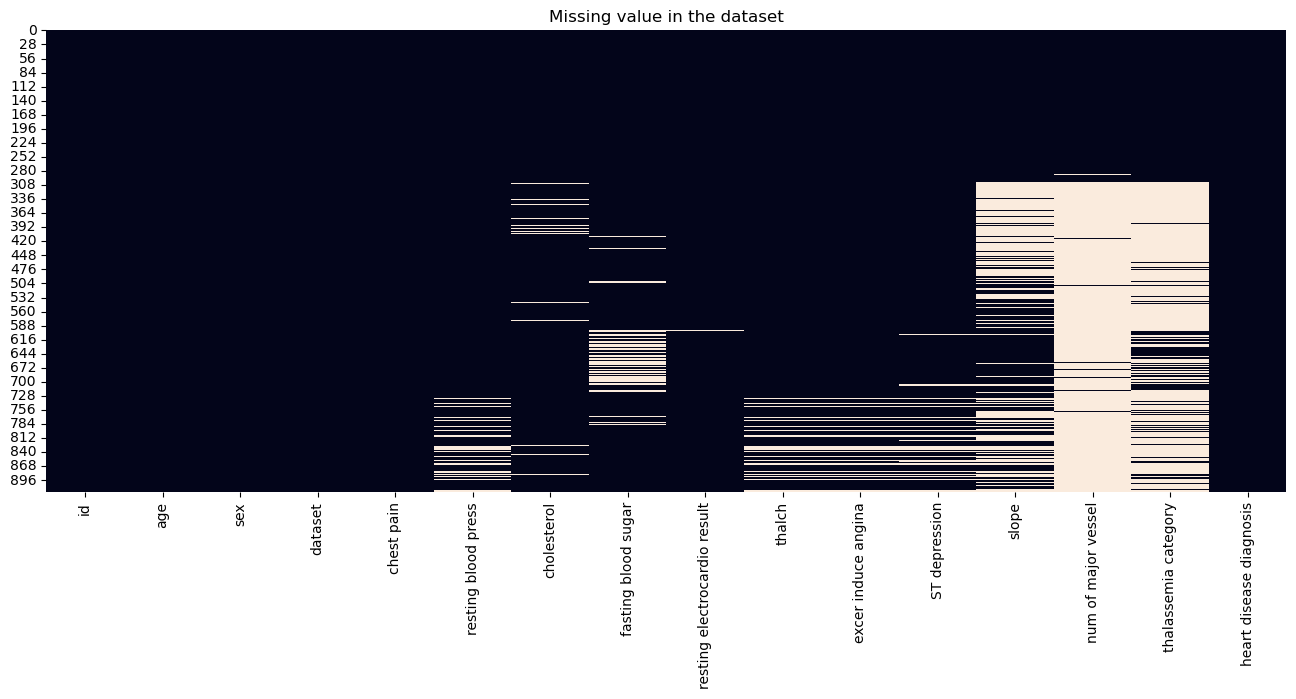

In [11]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing value in the dataset')
plt.show()

### The dataset shows a large number of missing values for the following columns: ca (number of major vessels) with 611 null values, thal (thalassemia category) with 486 null values, and slope with 309 null values. These significant amounts of missing data could greatly impact predictive analysis. Deleting columns or rows with missing values is not the best approach, as the number of missing values is almost as large as the total number of data records. To generate a reliable predictive model, it is necessary to preprocess the data by imputing the missing values. I propose imputing the missing values using the median for numerical columns or the most frequent value (mode) for categorical columns. This approach helps preserve the data and avoids the loss of valuable information compared to removing entire features or rows.

In [12]:
from sklearn.impute import SimpleImputer  

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']: # Check if column in numerical values
        data[[column]]  = num_imputer.fit_transform(data[[column]])
    else:
        data[[column]]  = cat_imputer.fit_transform(data[[column]]) #this is for categorical data



In [ ]:
def fill_with_random(data, column, min_val, max_val):
    for column in data.columns:
        if data[column].isna().any():
            data[column] = data[column].apply(
               lambda x: x if pd.notnull(x) else np.random.uniform(min_val, max_val)
    )

# Example: Filling missing values in each column
fill_with_random(data, 'num of major vessel', 0, 3)
fill_with_random(data, 'ST depression', 1, 6)
fill_with_random(data, 'resting blood press', 5, 200)
fill_with_random(data, 'thalch',60, 202)
fill_with_random(data, 'cholesterol', 1, 500)
                

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
for column in data.columns:
    if data[column].isna().any():
        if data[column] != data[column].dtype in ['int64', 'float64']:
            data[[column]]  = cat_imputer.fit_transform(data[[column]])

In [13]:
data.isna().sum() # reviewing if there is still missing values, the result showing no more missing values

id                              0
age                             0
sex                             0
dataset                         0
chest pain                      0
resting blood press             0
cholesterol                     0
fasting blood sugar             0
resting electrocardio result    0
thalch                          0
excer induce angina             0
ST depression                   0
slope                           0
num of major vessel             0
thalassemia category            0
heart disease diagnosis         0
dtype: int64

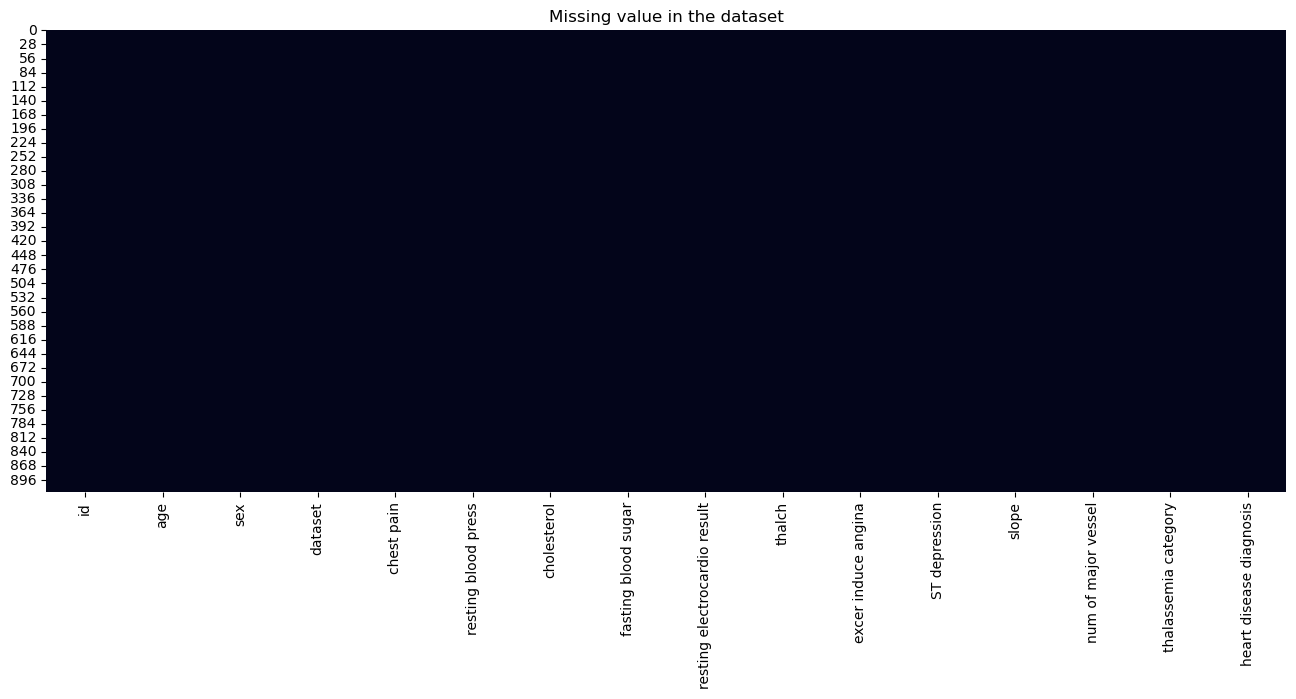

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing value in the dataset')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data

In [ ]:
data.info()

### Split data into training and testing, specific for data with object dtype will be converted to numerical with LabelEncoder

In [15]:
# convert all object type columns to numerical type
def convert_to_numerical(data):
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le  # Saveencoders if needed for inverse transform
    return data,label_encoders    


"le = LabelEncoder()\nfor column in data.columns:\n    if data[column].dtype == 'object':\n            # encode the categorical data to integers\n        data[column] = le.fit_transform(data[column])\nprint(data)"

In [16]:
X = data.drop(columns=['heart disease diagnosis']) # input features

In [17]:
y = data['heart disease diagnosis'] # target

In [18]:
X.shape

(920, 15)

In [19]:
y.shape

(920,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state = 42)

In [21]:
     
# Apply the conversion to training and testing dataset

X_train, encoders = convert_to_numerical(X_train)
X_test, _ = convert_to_numerical(X_test)

# Check the transform data after conversion

#print(X_train)
    
        
        

### Build model with RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators=25,  random_state=42)

In [24]:
# fit the model

model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [25]:
# predict the model on test data

y_predict = model.predict(X_test)

In [26]:
y_predict

array([0., 0., 1., 2., 1., 0., 1., 3., 2., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 3., 1., 3., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 2., 0., 2., 0., 0., 1., 2., 0., 2., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 2., 1., 0., 0., 1., 1., 1., 2., 0., 1.,
       0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       2., 2., 2., 1., 3., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 2., 0., 1., 2., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 2., 0., 0., 0., 0., 0., 1., 0.,
       0., 3., 1., 0., 2., 1., 0., 1., 1., 1., 3., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 3., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 3., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 2., 1., 0., 1., 0., 0., 3., 3., 1., 1., 1., 0.,
       2., 0., 0., 2., 0., 1., 1., 3., 1., 0., 3., 1., 0., 0., 1., 0., 1.,
       0., 0., 3., 0., 0.

In [27]:
# print the accuracy score

accuracy = accuracy_score(y_test, y_predict)
#rint('The accuracy with the RFS model is: ' )

In [28]:
accuracy

0.6366459627329193

In [29]:
# print the classification result

classification = classification_report(y_test, y_predict)
print( f' Classification report :\n {classification}')

 Classification report :
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.84       140
         1.0       0.55      0.62      0.59        93
         2.0       0.35      0.24      0.28        38
         3.0       0.35      0.17      0.23        41
         4.0       0.00      0.00      0.00        10

    accuracy                           0.64       322
   macro avg       0.40      0.39      0.39       322
weighted avg       0.58      0.64      0.60       322



C:\Users\sophia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sophia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sophia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]
        

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [31]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_predict)
roc_auc_dict

{0.0: 0.8579670329670329,
 1.0: 0.7092078696530028,
 2.0: 0.5884914751667902,
 3.0: 0.5622341810606719,
 4.0: 0.5}

In [32]:
y_test.unique()

array([0., 1., 3., 2., 4.])

print(f"The confusion matrix is:\n {confusion_matrix(y_test, y_predict)}")

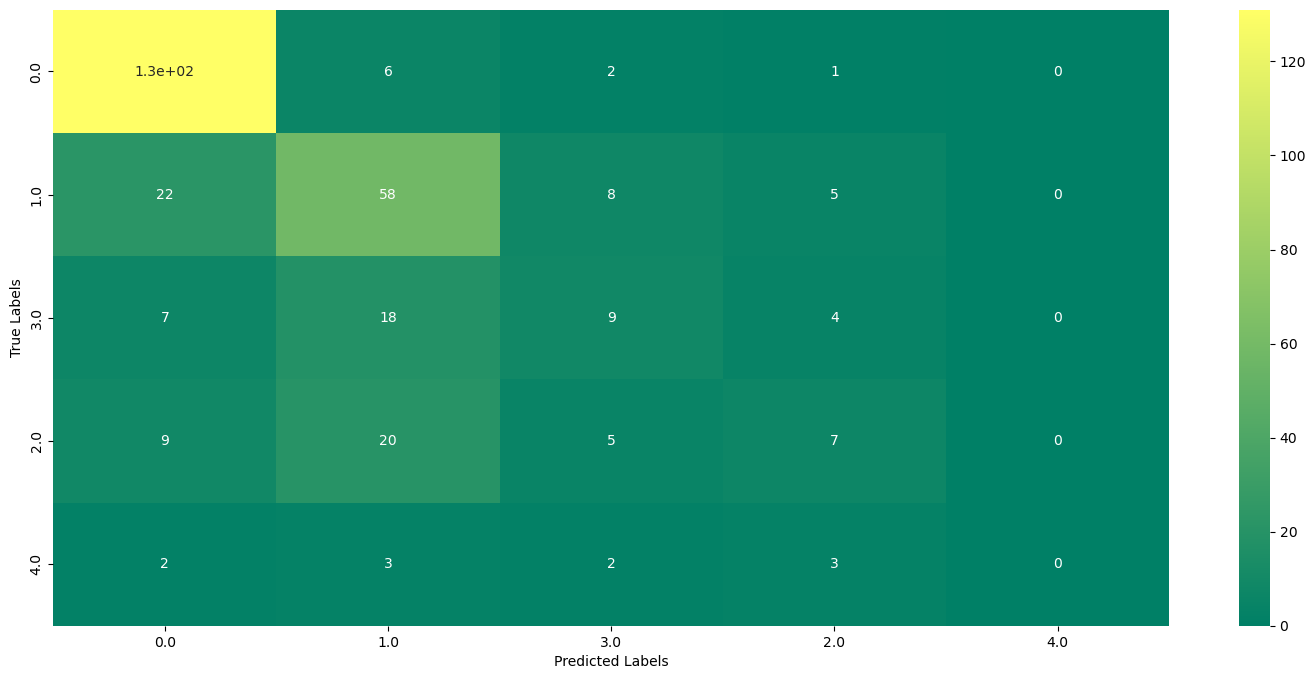

In [33]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Row 0 (True Class 0):
- 131 samples of class 0 were correctly predicted as class 0 or called as True Positive
- 6 samples of class 0 were misclassified as class 1.
- 2 samples of class 0 were misclassified as class 2.
- 1 sample of class 0 was misclassified as class 3.
- No sample were misclassified as class 4.

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the output
num_classes = 4
y_test_bin = label_binarize(y_test, classes=range(num_classes))
n_classes = y_test_bin.shape[1]
print(y_test.shape)
print(y_test_bin.shape)

(322,)
(322, 4)


In [35]:
# Binarize the output
print(y_predict.shape)
y_predict_bin = label_binarize(y_predict, classes=range(num_classes))
print(y_predict_bin.shape)

(322,)
(322, 4)


In [36]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(n_classes)
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_predict_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



4
4
4
4


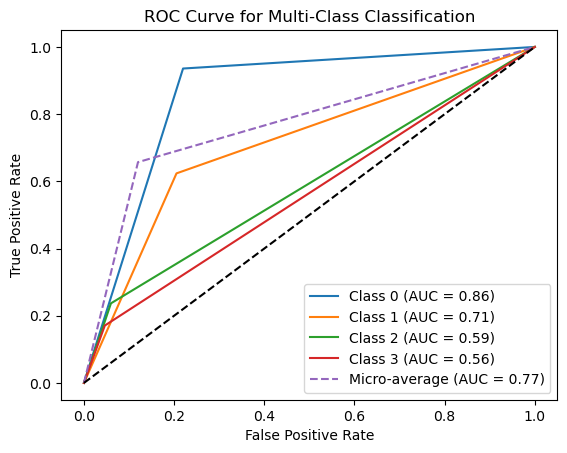

In [37]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_predict_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]), linestyle='--')

# Add diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

#### The ROC curve above presenting the performance of the model towards the predictive / target variables, in this case Class 0 indicates no presence of heart disease, Class 1 is Mild presence, Class 2 is moderate presence and Class 3 is Severe presence of heart disease. 

#### The Best performance model generated for Class 0 as the AUC=0.86, while the model struggles to distinguish Class 2 and Class 3 as their AUC values are relatively low (0.59 and 0.56). The Micro-average AUC = 0.77 suggest that overall the model has moderate performance across all classes. Lower AUC values for some classes indicate that features are not well seperated between classes, some classes have fewer samples than others.

#### The black dashed diagonal line represents the performance of random classifier. The closer a curve to this line means the worse the model's performance for that class.